In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
sTicker_lis =  ['3443','2388', '2498', '2610', '1319', '3035', '3006', '2615', '5425', '3105']
def dff(ticker):  
    a = pd.read_csv(ticker + '.csv')
    del a['Unnamed: 0']
    a = a[['return', 'time']]
    a.set_index('time', inplace = True)
    a.rename(columns={'return': ticker},inplace = True)
    return a

In [4]:
for i in range(len(sTicker_lis)):
    df = dff(sTicker_lis[i])
    if i == 0:
        total_df = df
    else:
        total_df = pd.merge(total_df, df, left_index=True, right_index=True, how='outer').fillna(method = 'ffill')


In [5]:
total_df.index = pd.to_datetime(total_df.index).strftime('%H:%M')

In [6]:
total_df.describe()

,3443,2388,2498,2610,1319,3035,3006,2615,5425,3105
count,184576.000000,184576.000000,184576.000000,184576.000000,184576.000000,184576.000000,184576.000000,184576.000000,184576.000000,184576.000000
mean,0.008452,0.018951,0.005808,-0.033759,-0.013434,0.034106,-0.005945,-0.004134,0.006189,-0.056050
std,0.006864,0.008422,0.005575,0.008723,0.005592,0.017961,0.009432,0.005744,0.004580,0.039922
min,-0.007000,-0.006330,-0.002510,-0.044307,-0.024910,-0.002100,-0.020420,-0.016385,-0.003365,-0.115825
25%,0.002000,0.013965,0.001640,-0.039702,-0.019240,0.024850,-0.016220,-0.009755,0.002875,-0.100775
50%,0.008000,0.019005,0.005325,-0.037997,-0.013570,0.034650,-0.003020,-0.001910,0.005995,-0.028350
75%,0.015500,0.026565,0.010575,-0.026627,-0.007900,0.049350,0.002380,0.000990,0.008075,-0.020000
max,0.023000,0.034125,0.021075,0.000878,0.000735,0.068950,0.012030,0.004380,0.020035,0.003325


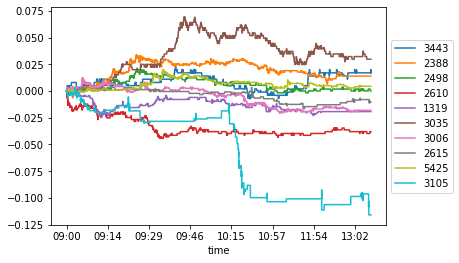

In [7]:

ax = total_df.plot()


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))